# SMS SPAM DETECTION USING ML

In [249]:
import numpy as np
import pandas as pd

In [250]:
df = pd.read_csv("E:/DATA-ANALYSIS/PYTHON/EMAIL SPAM CLASSIFIER ML Project/DataSet/spam.csv", encoding='latin1')

In [251]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3658,ham,Wait.i will come out.. &lt;#&gt; min:),NaN,NaN,NaN
2152,ham,Hi kindly give us back our documents which we ...,NaN,NaN,NaN
1027,ham,Are you not around or just still asleep? :V,NaN,NaN,NaN
2358,ham,I'll talk to the others and probably just come...,NaN,NaN,NaN
5412,ham,Gr8. So how do you handle the victoria island ...,NaN,NaN,NaN


In [252]:
df.shape

(5572, 5)

In [253]:
# 1. DATA CLEANING
# 2. EDA
# 3. TEXT PREPROCESSING
# 4. MODEL BUILDING
# 5. EVALUATION
# 6. IMPROVEMENT
# 7. WEBSITE
# 8. DEPLOYMENT

# 1. Data Cleaning

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [255]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [256]:
df.sample(5)

,v1,v2
3486,ham,Change windows logoff sound..
1031,ham,Yup bathe liao...
4702,ham,Mmmmmmm *snuggles into you* ...*deep contented...
1360,ham,Yo dude guess who just got arrested the other day
632,ham,Oh that was a forwarded message. I thought you...


In [257]:
# Rename the columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
3079,ham,S.s:)i thinl role is like sachin.just standing...
3594,ham,Huh but i cant go 2 ur house empty handed right?
1651,ham,I wan but too early lei... Me outside now wun ...
2620,ham,How come?
4905,ham,Will you come online today night


In [258]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [259]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [260]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [261]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [262]:
# remove duplicate values
df = df.drop_duplicates(keep='first')

In [263]:
df.duplicated().sum()

np.int64(0)

In [264]:
df.shape

(5169, 2)

# 2. EDA

In [265]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [266]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

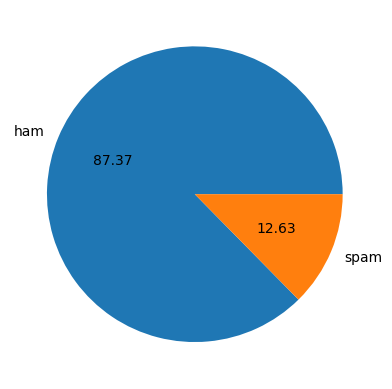

In [267]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [268]:
# Data is imbalanced

In [269]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [270]:
df['num_characters'] = df['text'].apply(len)

In [271]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [272]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [273]:
#num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [274]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [275]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()  # ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [276]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()  # spam

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [277]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

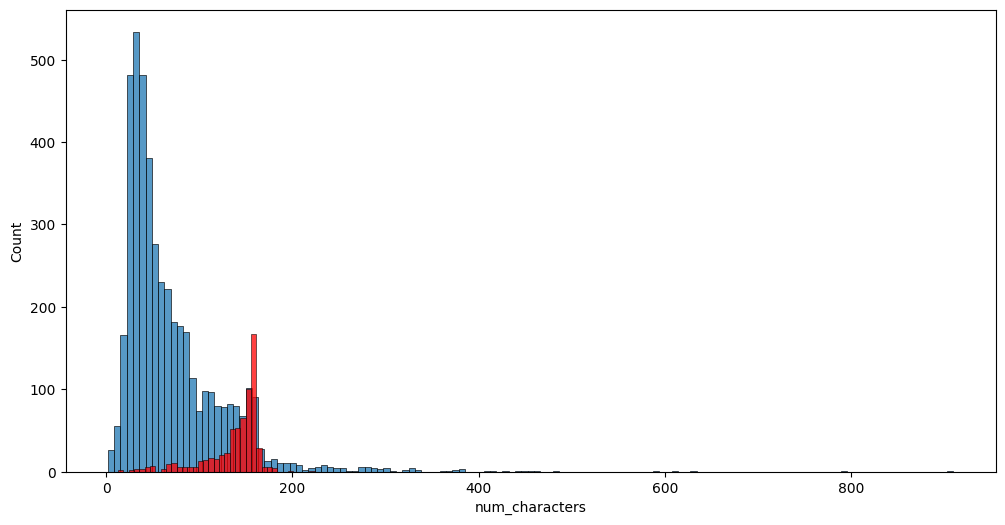

In [278]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

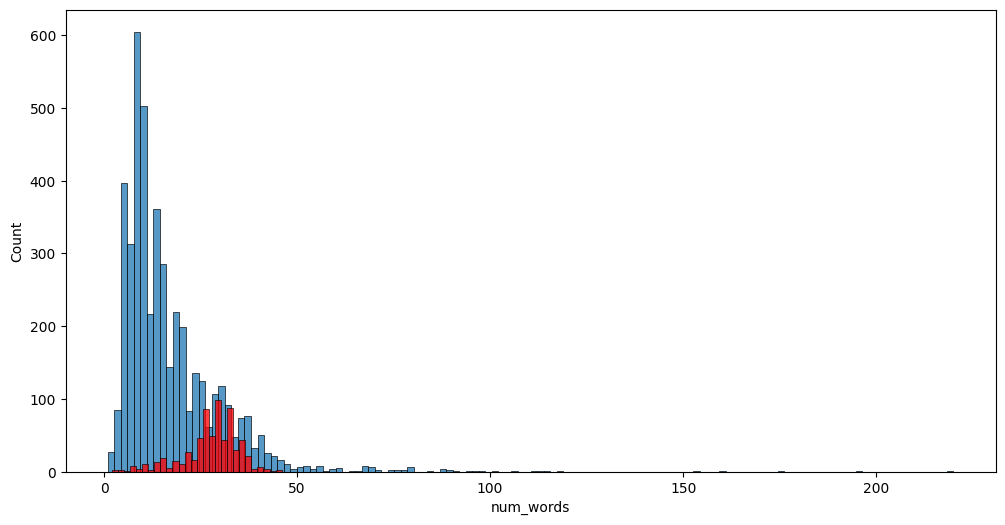

In [279]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

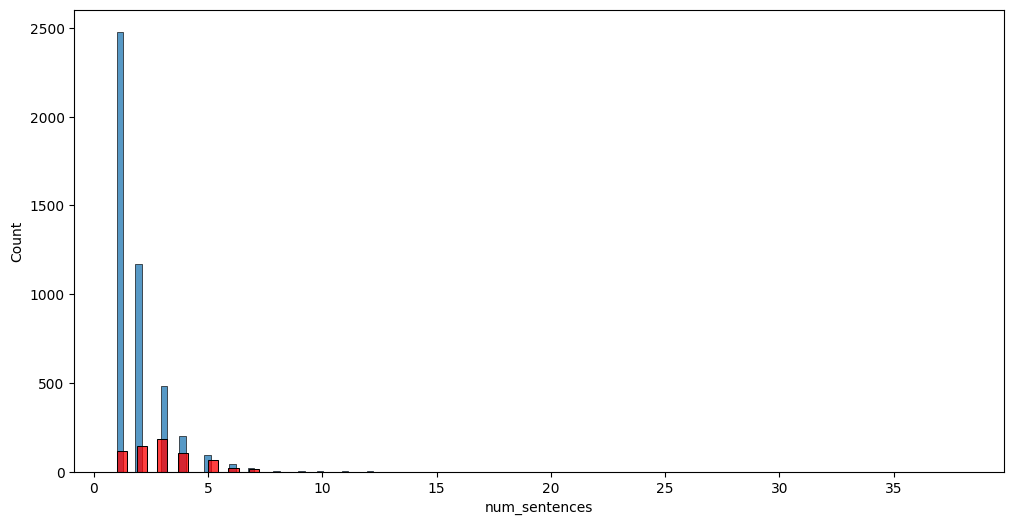

In [280]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

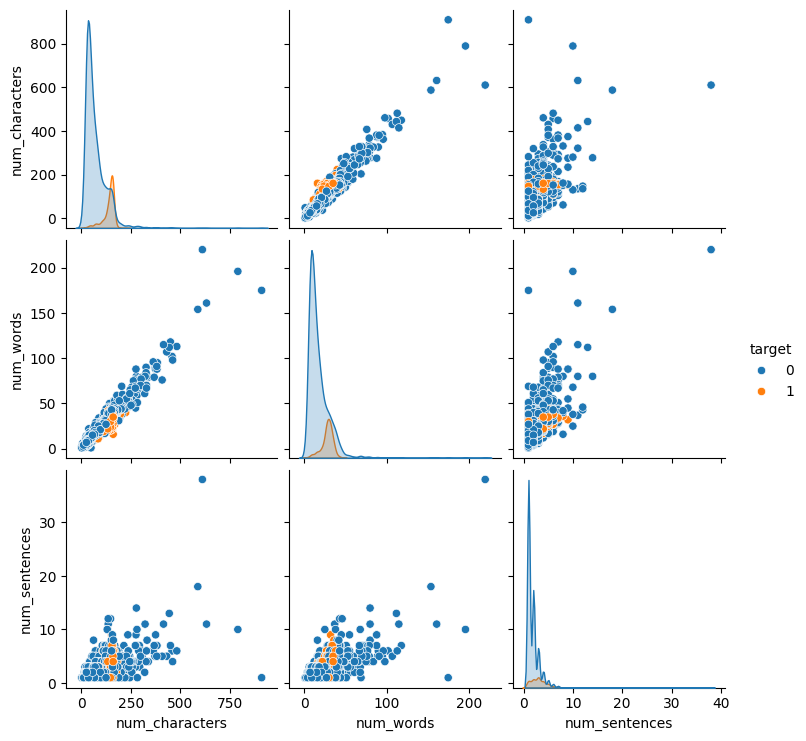

In [281]:
sns.pairplot(df, hue='target')

<Axes: >

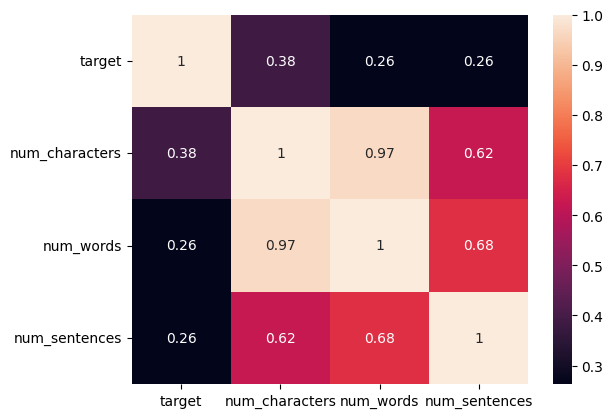

In [282]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)


# 3. Data Preprocessing

 * Lower case 
 * Tokenization
 * Removing special characters
 * Removing stop words and punctuation
 * Stemming or lemitization

In [283]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [284]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download stopwords
nltk.download('stopwords')

# Initialize stemmer and stopword list
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def transform_text(text):
    # 1. Lowercase the text
    text = text.lower()
    
    # 2. Remove non-alphanumeric characters (punctuation etc.)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # 3. Tokenize
    words = text.split()
    
    # 4. Remove stopwords and apply stemming
    filtered_words = []
    for word in words:
        if word not in stop_words:
            stemmed = ps.stem(word)
            filtered_words.append(stemmed)
    
    # 5. Join the result
    return " ".join(filtered_words)

# Test the function
sample = "Hello World! I am a data scientist. I love to build ML models."
print(transform_text(sample))


hello world data scientist love build ml model


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [285]:
# Text Preprocessing
def transform_text(text):
    text = text.lower()#Lower case
    text = nltk.word_tokenize(text) #tokenization

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():# isalnum() checks if the string consists of alphanumeric characters only
            y.append(i)

    text = y[:]# copy the list
    y.clear()# clear the list

    # Removing stop words and punctuation
    import string
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: 
            y.append(i)

    text = y[:]# copy the list
    y.clear()# clear the list

    # Stemming or lemitization- it means reducing a word to its root word like playing, played, plays to play
    from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()# create an object of PorterStemmer class
    for i in text:
        y.append(ps.stem(i)) # type: ignore


    return " ".join(y)# join the list elements with space

In [286]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [287]:
df['transformed_text'] = df['text'].apply(transform_text)

In [288]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [289]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500, min_font_size=10, background_color = 'white')

In [290]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

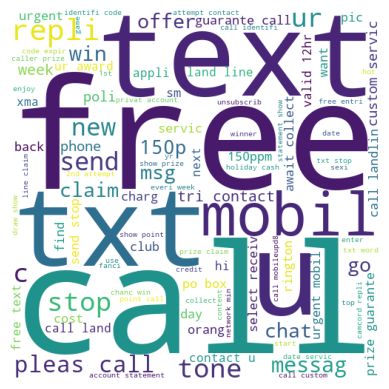

In [291]:
plt.imshow(spam_wc)
plt.axis('off')

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

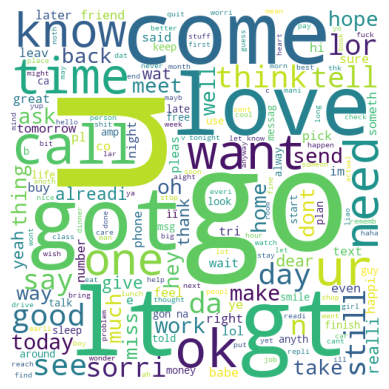

In [292]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.axis('off')

In [293]:
#Top 30 most common words in spam message
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [294]:
len(spam_corpus)

9939

<Axes: xlabel='Count', ylabel='Words'>

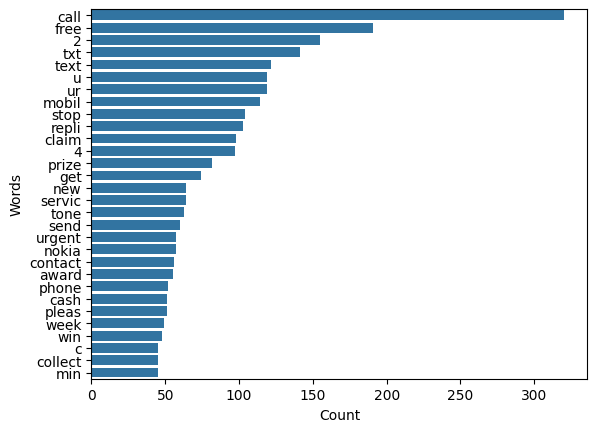

In [295]:
from collections import Counter
spam_counter = Counter(spam_corpus)
spam_common_words = pd.DataFrame(spam_counter.most_common(30))
spam_common_words.columns = ['Words', 'Count']

sns.barplot(x = 'Count', y = 'Words', data=spam_common_words)

<Axes: xlabel='Count', ylabel='Words'>

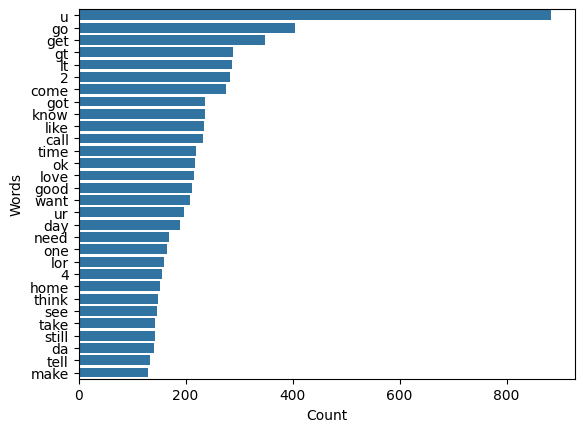

In [296]:
#Top 30 most common words in ham message
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

ham_counter = Counter(ham_corpus)
ham_common_words = pd.DataFrame(ham_counter.most_common(30))
ham_common_words.columns = ['Words', 'Count']

sns.barplot(x = 'Count', y = 'Words', data=ham_common_words)
     

# 4. Model Building

### Naive Based Model Building - Good for Text Data Processing

In [297]:
# Vectorization - Bag of words (Count Vectorization)
from sklearn.feature_extraction.text import CountVectorizer    
cv = CountVectorizer() 

In [298]:
X = cv.fit_transform(df['transformed_text']).toarray() 

In [299]:
X.shape

(5169, 6708)

In [300]:
y = df['target'].values

In [301]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [302]:
from sklearn.model_selection import train_test_split

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [304]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [305]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [306]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [307]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [308]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [309]:
# Vectorization - Bag of words (Tfidf Vectorization)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer   
tfidf = TfidfVectorizer(max_features=3000)

In [310]:
X = tfidf.fit_transform(df['transformed_text']).toarray() 

In [311]:
# To improve the model efficiency
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [312]:
# appending the num character col to X
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [313]:

X.shape
y = df['target'].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8945841392649904
[[802  94]
 [ 15 123]]
0.5668202764976958
0.9729206963249516
[[890   6]
 [ 22 116]]
0.9508196721311475
0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [314]:
# tfidf ---> MNB

In [315]:
#Import all best Models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [316]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimator=50, random_state=2)

In [317]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
   'GBC' : gbc,
   'AdaBoost' : abc,
   'BgC' : bc,
   'ETC' : etc,
    'xgb' : xgb

}

In [318]:
#Function to train and evaluate all the models
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [319]:
train_classifier(svc, X_train,y_train,X_test,y_test)

e:\MASTERS IN MIS\PYTHON\Learning Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


(0.8665377176015474, 0.0)

In [320]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy, current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

e:\MASTERS IN MIS\PYTHON\Learning Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


For SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For KN
Accuracy -  0.8868471953578336
Precision -  0.8620689655172413
For NB
Accuracy -  0.9729206963249516
Precision -  0.9508196721311475
For DT
Accuracy -  0.9468085106382979
Precision -  0.8878504672897196
For LR
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143
For RF
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For GBC
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For AdaBoost
Accuracy -  0.9448742746615088
Precision -  0.8932038834951457
For BgC
Accuracy -  0.960348162475822
Precision -  0.8646616541353384
For ETC
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492


e:\MASTERS IN MIS\PYTHON\Learning Python\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:27:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


For xgb
Accuracy -  0.971953578336557
Precision -  0.9504132231404959


In [321]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy': accuracy_scores,'Precision': precision_scores}).sort_values(by=['Precision','Accuracy'],ascending=False)

In [322]:
performance_df

,Algorithm,Accuracy,Precision
9,ETC,0.980658,0.983607
5,RF,0.972921,0.982456
4,LR,0.967118,0.964286
2,NB,0.972921,0.950820
10,xgb,0.971954,0.950413
6,GBC,0.950677,0.930693
7,AdaBoost,0.944874,0.893204
3,DT,0.946809,0.887850
8,BgC,0.960348,0.864662
1,KN,0.886847,0.862069


In [323]:
performance_df1 = pd.melt(performance_df, id_vars= 'Algorithm')

In [324]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.980658
1,RF,Accuracy,0.972921
2,LR,Accuracy,0.967118
3,NB,Accuracy,0.972921
4,xgb,Accuracy,0.971954
5,GBC,Accuracy,0.950677
6,AdaBoost,Accuracy,0.944874
7,DT,Accuracy,0.946809
8,BgC,Accuracy,0.960348
9,KN,Accuracy,0.886847


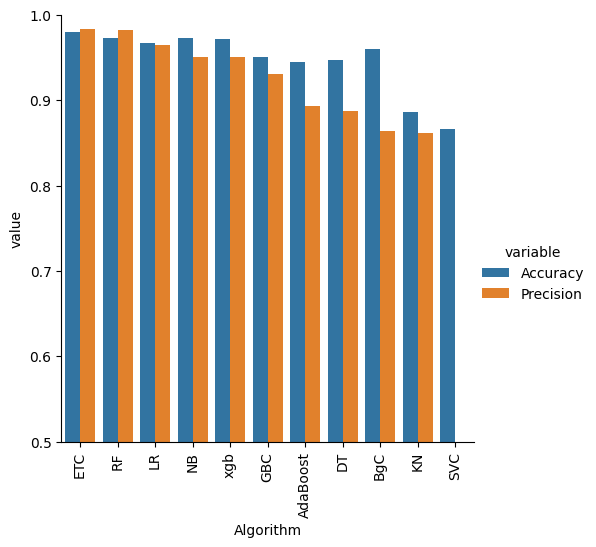

In [325]:
sns.catplot(x = 'Algorithm', y= 'value',
            hue = 'variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [326]:
# model improve
# 1. Change the max_features parameter of Tfidf

In [327]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'precision_max_ft_3000':precision_scores})

In [328]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [329]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,precision_max_ft_3000
0,ETC,0.980658,0.983607,0.980658,0.983607
1,RF,0.972921,0.982456,0.972921,0.982456
2,LR,0.967118,0.964286,0.967118,0.964286
3,NB,0.972921,0.950820,0.972921,0.950820
4,xgb,0.971954,0.950413,0.971954,0.950413
5,GBC,0.950677,0.930693,0.950677,0.930693
6,AdaBoost,0.944874,0.893204,0.944874,0.893204
7,DT,0.946809,0.887850,0.946809,0.887850
8,BgC,0.960348,0.864662,0.960348,0.864662
9,KN,0.886847,0.862069,0.886847,0.862069


In [330]:
temp1_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_Scaling':accuracy_scores,'precision_Scaling':precision_scores})

In [331]:
new_Scaled_df = new_df.merge(temp1_df, on='Algorithm')

In [332]:
new_Scaled_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,precision_max_ft_3000,Accuracy_Scaling,precision_Scaling
0,ETC,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607
1,RF,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
2,LR,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286
3,NB,0.972921,0.950820,0.972921,0.950820,0.972921,0.950820
4,xgb,0.971954,0.950413,0.971954,0.950413,0.971954,0.950413
5,GBC,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
6,AdaBoost,0.944874,0.893204,0.944874,0.893204,0.944874,0.893204
7,DT,0.946809,0.887850,0.946809,0.887850,0.946809,0.887850
8,BgC,0.960348,0.864662,0.960348,0.864662,0.960348,0.864662
9,KN,0.886847,0.862069,0.886847,0.862069,0.886847,0.862069


In [333]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [334]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb),('et',etc)],voting='soft')

In [335]:
voting.fit(X_train,y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [336]:
y_pred = voting.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9748549323017408
Precision 1.0


In [337]:
# Applying stacking
from sklearn.ensemble import StackingClassifier
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [338]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9748549323017408
Precision 0.9117647058823529


In [339]:
import pickle 
pickle.dump(tfidf,open('Vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))